In [0]:
from pyspark.sql import SparkSession
data_spark = SparkSession.builder.appName('DataFrame_article').getOrCreate()
data_spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Replace 'your_table_name' with the name of your table in Databricks
table_name = "gwp"
# Read the table data into a Spark DataFrame
spark_df = spark.sql(f"SELECT * FROM {table_name}")
# Convert the Spark DataFrame to a Pandas DataFrame
df_gwp = spark_df.toPandas()
# Display the first few rows of the DataFrame
df_gwp.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108,7080,98,0,0,0,59,0.940725424
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,None,960,0,0,0,0,8,0.8865
2,1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
3,1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968,3660,50,0,0,0,30.5,0.800570492
4,1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.9,1170,1920,50,0,0,0,56,0.800381944


Attributes information
- date: Date in MM-DD-YYYY
- day: Day of the Week
- quarter: A portion of the month. A month was divided into four quarters
- department:	Associated department with the instance
- team_no: Associated team number with the instance
- no_of_workers: Number of workers in each team
- no_of_style_change: Number of changes in the style of a particular product
- targeted_productivity	: Targeted productivity set by the Authority for each team for each day.
- smv: Standard Minute Value, it is the allocated time for a task
- wip: Work in progress. Includes the number of unfinished items for products
- over_time: Represents the amount of overtime by each team in minutes
- incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- idle_time: The amount of time when the production was interrupted due to several reasons
- idle_men:	The number of workers who were idle due to production interruption
- actual_productivity: The actual % of productivity that was delivered by the workers. It ranges from 0-1.

#DATA CLEAN

In [0]:
#Number of rows and columes
num_rows, num_columns = df_gwp.shape
# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1197
Number of columns: 15


In [0]:
#Percent of missing values by columns
missing_percent = df_gwp.isnull().sum() / len(df_gwp) * 100
missing_percent

Out[54]: date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

wip has 42% missing values, we handle this issue by impute the colume by mean value

In [0]:
df_gwp.dtypes

Out[55]: date                     object
quarter                  object
department               object
day                      object
team                     object
targeted_productivity    object
smv                      object
wip                      object
over_time                object
incentive                object
idle_time                object
idle_men                 object
no_of_style_change       object
no_of_workers            object
actual_productivity      object
dtype: object

In [0]:
# Convert all number-like values in the DataFrame to integers
df_gwp = df_gwp.apply(pd.to_numeric, errors='ignore', downcast='integer')
columns_to_convert = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'actual_productivity']
for col in columns_to_convert:
    df_gwp[col] = pd.to_numeric(df_gwp[col], errors='ignore', downcast='integer')

In [0]:
mean_value = df_gwp['wip'].mean()
df_gwp['wip'].fillna(mean_value, inplace=True)

In [0]:
#Percent of missing values by columns
missing_percent = df_gwp.isnull().sum() / len(df_gwp) * 100
missing_percent

Out[58]: date                     0.0
quarter                  0.0
department               0.0
day                      0.0
team                     0.0
targeted_productivity    0.0
smv                      0.0
wip                      0.0
over_time                0.0
incentive                0.0
idle_time                0.0
idle_men                 0.0
no_of_style_change       0.0
no_of_workers            0.0
actual_productivity      0.0
dtype: float64

Now, all the attributes have no missing value. We can work on the next step - data preprocessing with descriptive analysis

In [0]:
#Handle the date column
# Convert the date_column to datetime if it's not already a datetime dtype
df_gwp['date'] = pd.to_datetime(df_gwp['date'])
# Extract month and year from the datetime column as strings and numbers
df_gwp['month'] = df_gwp['date'].dt.strftime('%B')  
df_gwp['year'] = df_gwp['date'].dt.strftime('%Y')  
#Drop 'date' colume
df_gwp = df_gwp.drop('date', axis=1, inplace=False)
# Display the first few rows of the updated DataFrame
df_gwp.head()


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,January,2015
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,January,2015
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,January,2015
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,January,2015
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,January,2015


#DATA PREPROCESSING WITH DESCRIPTIVE ANALYSIS

**1. Statistical values**

In [0]:
df_gwp.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1395.647261,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1190.465991,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1190.465991,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**2. Label distribution**

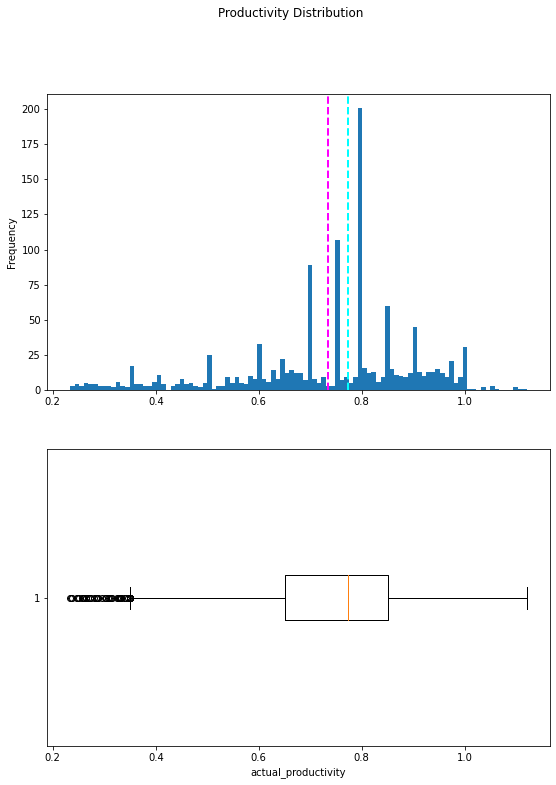

In [0]:
label = df_gwp['actual_productivity']

#create figure for 2 subplots
fig, ax = plt.subplots(2,1,figsize=(9,12))

#plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

#add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

#plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('actual_productivity')

#add a title to the figure
fig.suptitle('Productivity Distribution')
fig.show()

**3. Features distribution**

In [0]:
numeric_features = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']
categorical_features = ['quarter', 'department', 'day', 'month']

***Numerical features***

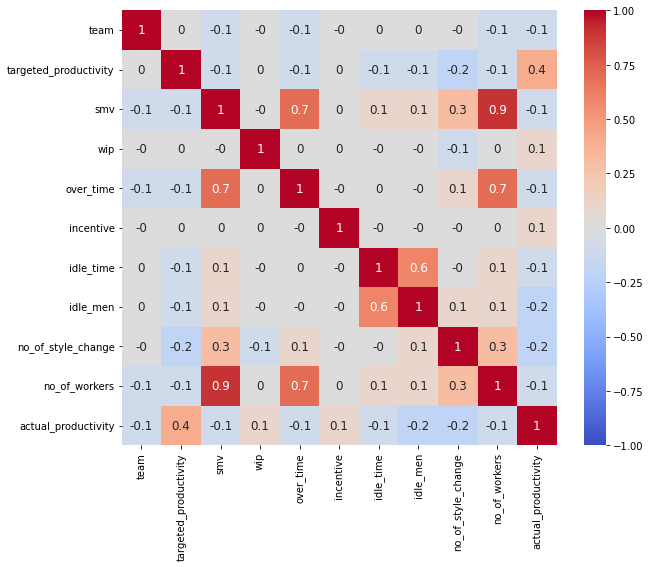

In [0]:
#plot the corr_matrix
corr_matrix = df_gwp.corr().round(1)

# Plot the matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, annot=True, annot_kws={"size": 12})
plt.show()

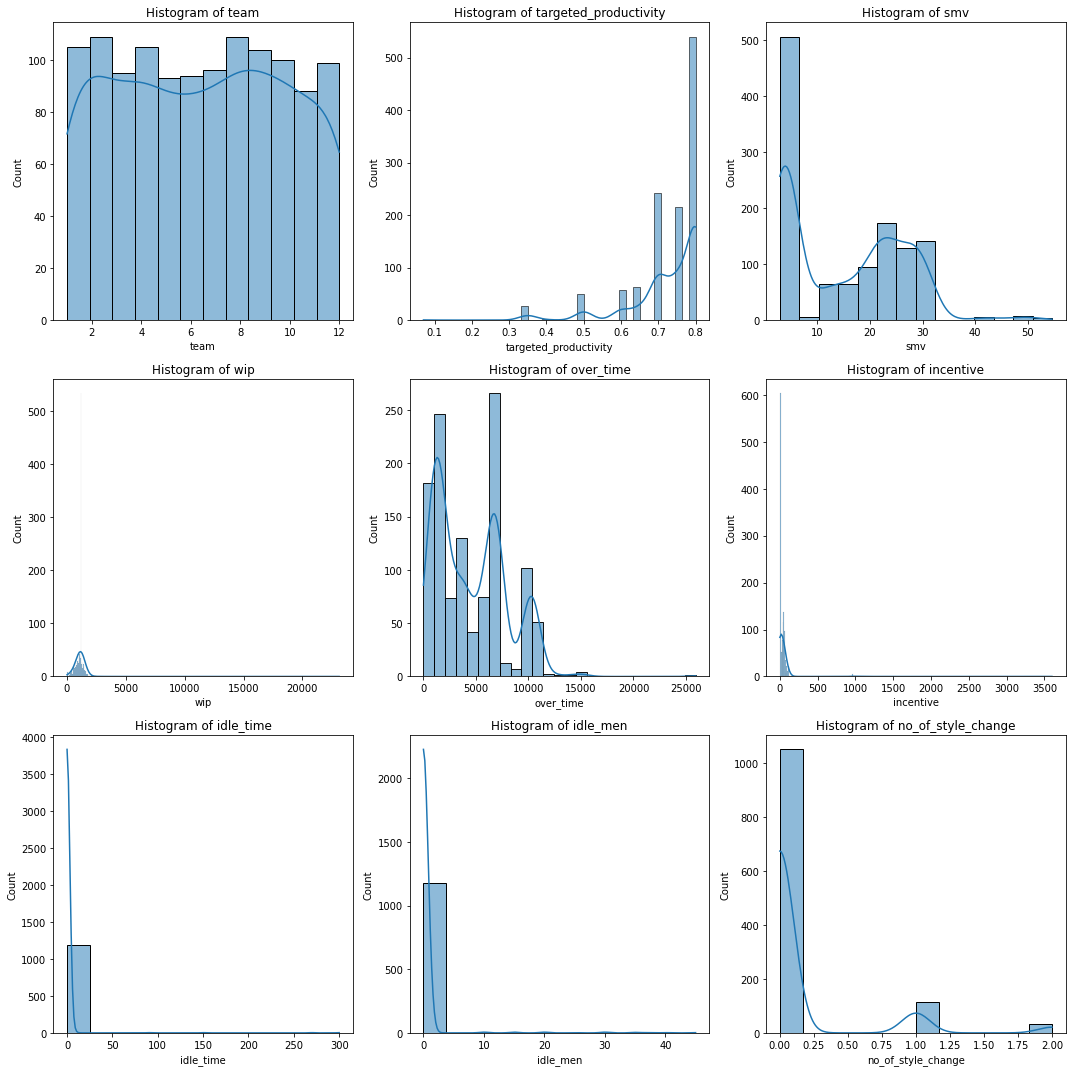

In [0]:
# Subplot grid
n_features = len(numeric_features)
n_cols = 3  # Customize the number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

# Display the plot
for i, feature in enumerate(numeric_features):
    sns.histplot(ax=axes[i], data=df_gwp[feature], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    
plt.tight_layout()
plt.show()


***Categorical features***

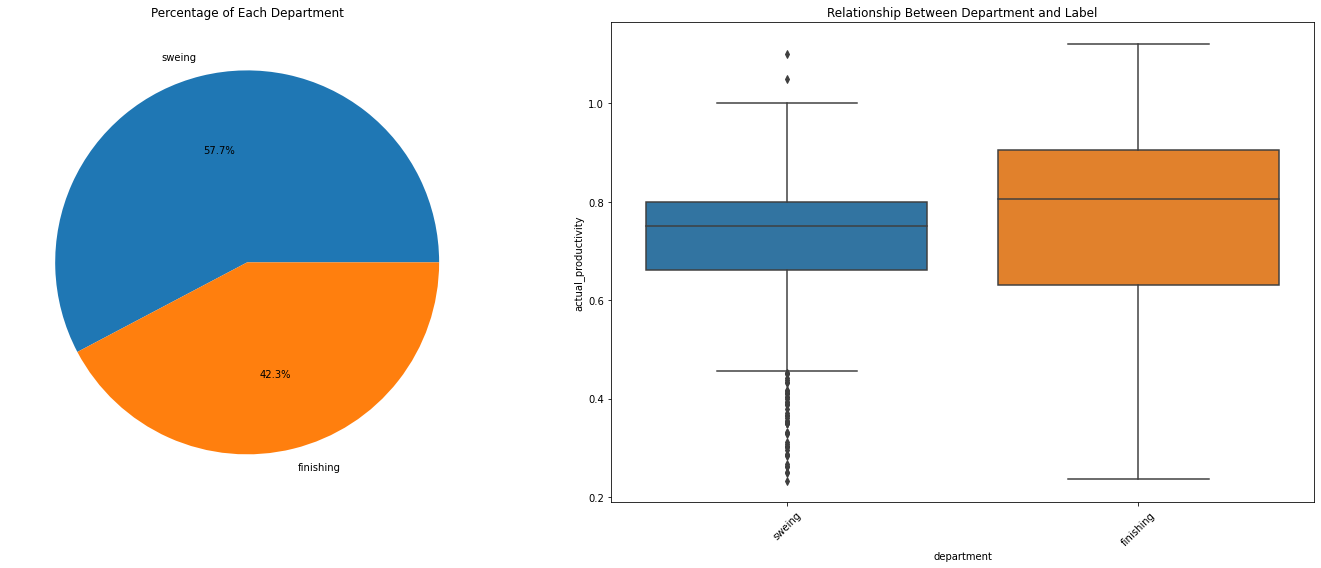

In [0]:
# Create a figure and a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Pie chart showing the percentage of each department
df_gwp['department'] = df_gwp['department'].str.lower().str.strip()
no_of_departments = df_gwp['department'].value_counts()
axes[0].pie(no_of_departments, labels=no_of_departments.index, autopct='%.1f%%')
axes[0].set_title('Percentage of Each Department')

# The relationship between each department and the label 
sns.boxplot(ax=axes[1], x='department', y=label, data=df_gwp)
axes[1].set_title('Relationship Between Department and Label')
axes[1].tick_params(axis='x', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [0]:
no_of_departments

Out[66]: sweing       691
finishing    506
Name: department, dtype: int64

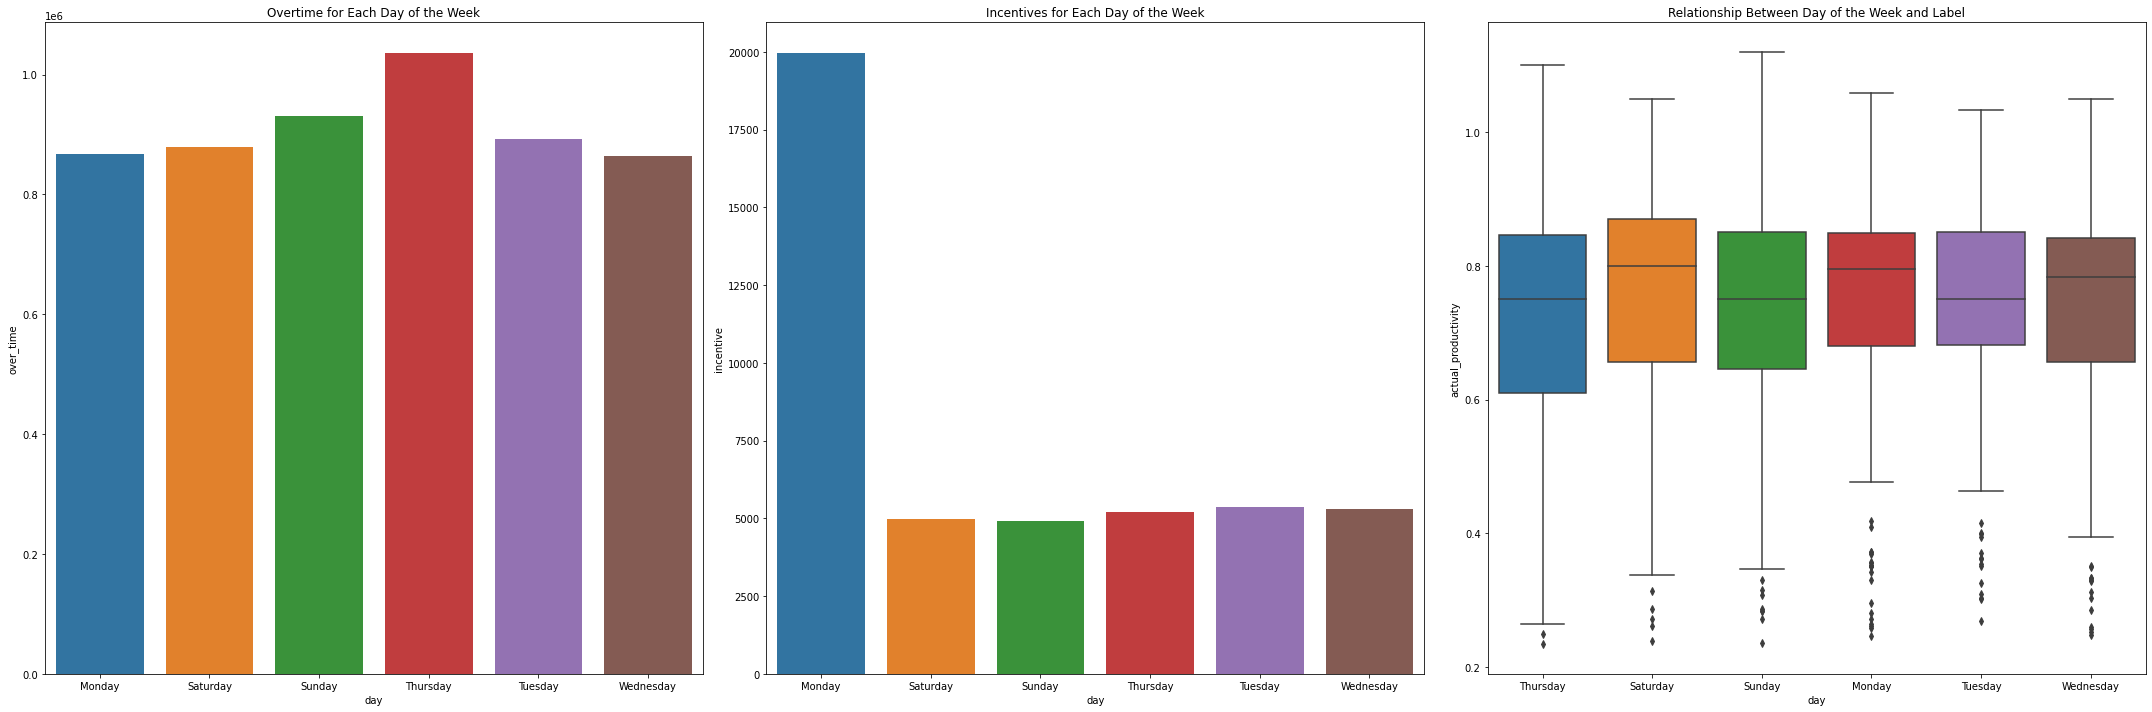

In [0]:
# Group by day and aggregate over_time and incentive
data_day = df_gwp.groupby('day').agg({
    'over_time': 'sum',
    'incentive': 'sum'
}).reset_index()

# Subplot grid
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Overtime in each day of the week
sns.barplot(ax=axes[0], x='day', y='over_time', data=data_day)
axes[0].set_title('Overtime for Each Day of the Week')

# Incentives in each day of the week
sns.barplot(ax=axes[1], x='day', y='incentive', data=data_day)
axes[1].set_title('Incentives for Each Day of the Week')

# The relationship between each day of week and label
sns.boxplot(ax=axes[2], x='day', y=label, data=df_gwp) 
axes[2].set_title('Relationship Between Day of the Week and Label')

# Display the plot
plt.tight_layout()
plt.show()

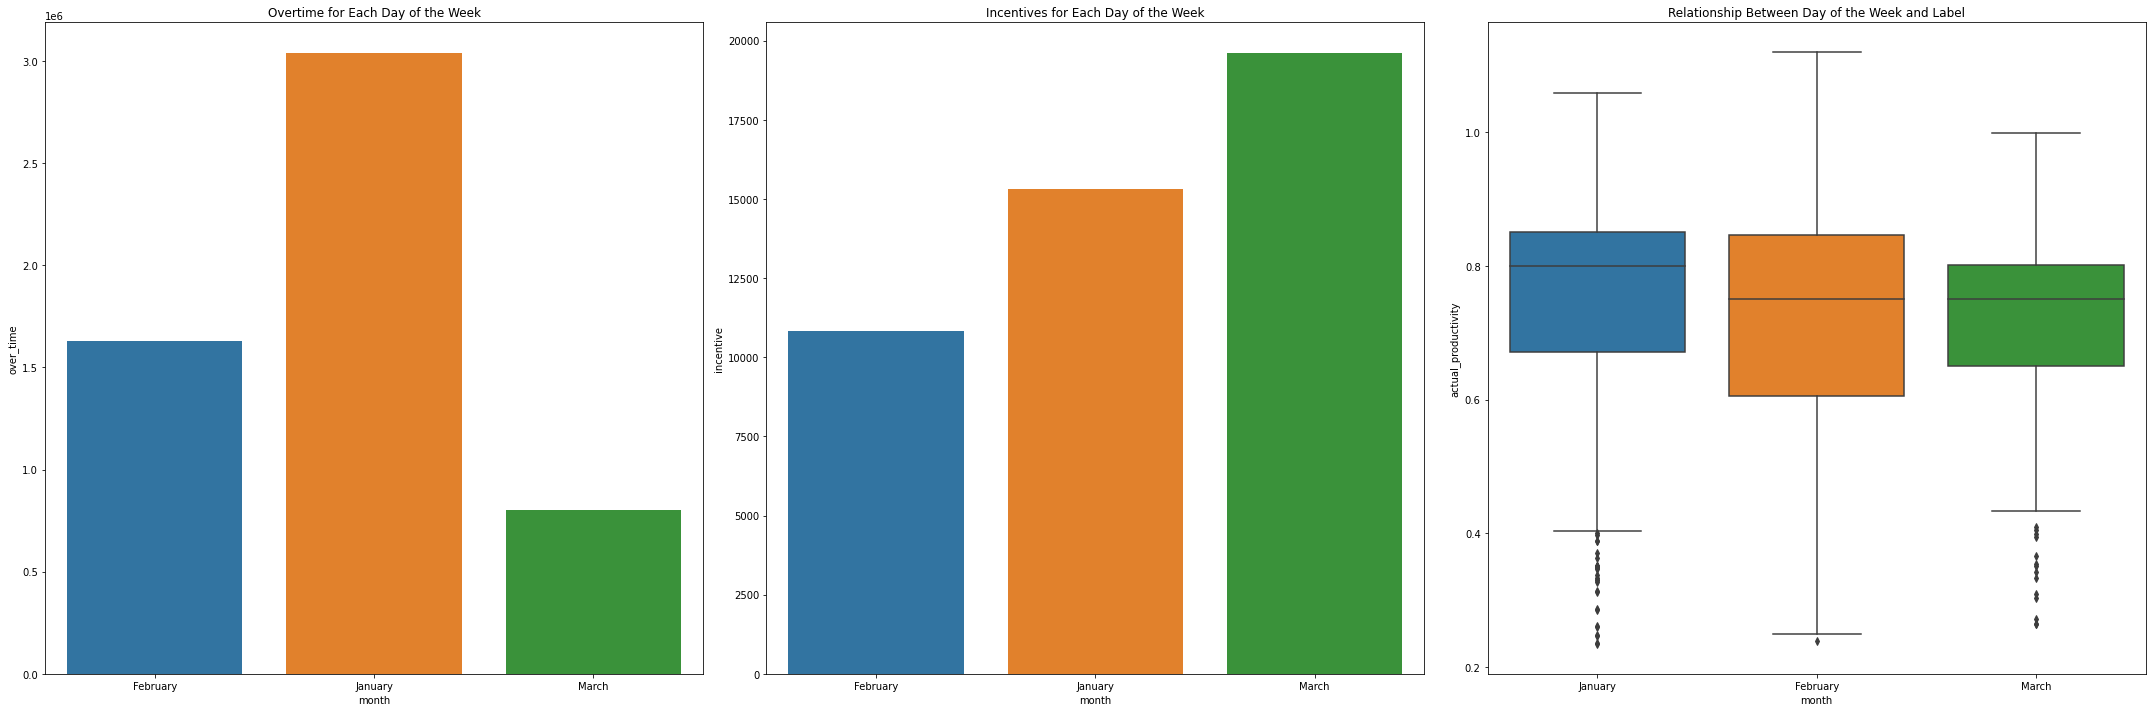

In [0]:
# Group by day and aggregate over_time and incentive
data_day = df_gwp.groupby('month').agg({
    'over_time': 'sum',
    'incentive': 'sum'
}).reset_index()

# Subplot grid
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Overtime in each day of the week
sns.barplot(ax=axes[0], x='month', y='over_time', data=data_day)
axes[0].set_title('Overtime for Each Day of the Week')

# Incentives in each day of the week
sns.barplot(ax=axes[1], x='month', y='incentive', data=data_day)
axes[1].set_title('Incentives for Each Day of the Week')

# The relationship between each day of week and label
sns.boxplot(ax=axes[2], x='month', y=label, data=df_gwp) 
axes[2].set_title('Relationship Between Day of the Week and Label')

# Display the plot
plt.tight_layout()
plt.show()

***Target productivity and actual productivity***

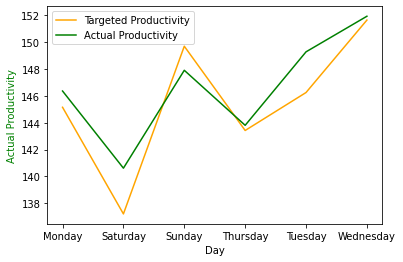

In [0]:
#calculate targeted productivity grouped by day
sum_targeted_productivity = df_gwp.groupby([pd.Grouper(key='day')])['targeted_productivity'].sum()

#calculate actual productivity grouped by day
sum_actual_productivity = df_gwp.groupby([pd.Grouper(key='day')])['actual_productivity'].sum()

# create the figure and axis objects
fig, ax1 = plt.subplots()

# create the first line for targeted productivity
ax1.plot(sum_targeted_productivity, color='orange')
ax1.set_xlabel('Day')
ax1.set_ylabel('Targeted Productivity', color='orange')

# create the second line for actual productivity on the same axis
ax1.plot(sum_actual_productivity, color='green')
ax1.set_ylabel('Actual Productivity', color='green')

# create a legend
ax1.legend(['Targeted Productivity', 'Actual Productivity'])

# show the plot
plt.show()

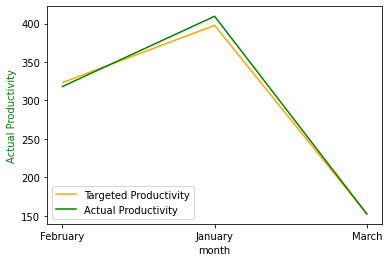

In [0]:
#calculate targeted productivity grouped by day
sum_targeted_productivity = df_gwp.groupby([pd.Grouper(key='month')])['targeted_productivity'].sum()

#calculate actual productivity grouped by day
sum_actual_productivity = df_gwp.groupby([pd.Grouper(key='month')])['actual_productivity'].sum()

# create the figure and axis objects
fig, ax1 = plt.subplots()

# create the first line for targeted productivity
ax1.plot(sum_targeted_productivity, color='orange')
ax1.set_xlabel('month')
ax1.set_ylabel('Targeted Productivity', color='orange')

# create the second line for actual productivity on the same axis
ax1.plot(sum_actual_productivity, color='green')
ax1.set_ylabel('Actual Productivity', color='green')

# create a legend
ax1.legend(['Targeted Productivity', 'Actual Productivity'])

# show the plot
plt.show()

#DATA PREPROCESSING

In [0]:
spark_clean_df = spark.createDataFrame(df_gwp) # Convert Pandas DataFrame to PySpark DataFrame
spark_clean_df = spark_clean_df.drop("year")# remove unwanted column
spark_clean_df.select("actual_productivity").show(5)

+-------------------+
|actual_productivity|
+-------------------+
|        0.940725424|
|             0.8865|
|        0.800570492|
|        0.800570492|
|        0.800381944|
+-------------------+
only showing top 5 rows



In [0]:
from pyspark.sql.types import DoubleType, IntegerType

# Cast columns to appropriate data types
spark_clean_df = spark_clean_df.withColumn("team", spark_clean_df["team"].cast(IntegerType())) \
    .withColumn("no_of_workers", spark_clean_df["no_of_workers"].cast(IntegerType())) \
    .withColumn("no_of_style_change", spark_clean_df["no_of_style_change"].cast(IntegerType())) \
    .withColumn("targeted_productivity", spark_clean_df["targeted_productivity"].cast(DoubleType())) \
    .withColumn("smv", spark_clean_df["smv"].cast(DoubleType())) \
    .withColumn("wip", spark_clean_df["wip"].cast(DoubleType())) \
    .withColumn("over_time", spark_clean_df["over_time"].cast(IntegerType())) \
    .withColumn("incentive", spark_clean_df["incentive"].cast(DoubleType())) \
    .withColumn("idle_time", spark_clean_df["idle_time"].cast(DoubleType())) \
    .withColumn("idle_men", spark_clean_df["idle_men"].cast(IntegerType())) \
    .withColumn("actual_productivity", spark_clean_df["actual_productivity"].cast(DoubleType()))
#spark_clean_df.show(5)

In [0]:
spark_clean_df = spark_clean_df.drop("no_of_workers")# drop the column as it is to reduce multicollinearity affect

In [0]:
target = 'actual_productivity' # setting for target variable

In [0]:
# Spark categorical variables
dtypes = spark_clean_df.dtypes
cat_input = []
for i in range(0, len(spark_clean_df.columns)):
  if dtypes[i][1] == 'string': #identify categorical variable
    cat_input.append(dtypes[i][0]) 
cat_input = list(set(cat_input)-set(target)) # assigned only number types variable without target variable
#cat_input

In [0]:
# Spark numerical variables
num_input = list(set(spark_clean_df.columns) - set([target]) - set(cat_input)) # assigned only number types variable without target variable
#num_input

In [0]:
from pyspark.sql.functions import *
# final check for null value in Spark dataframe
null_counts = spark_clean_df.select([when(isnull(c), 1).otherwise(0).alias(c) for c in spark_clean_df.columns]).groupBy().sum()
print("Final check for null values:")
for column in spark_clean_df.columns:
    print(f"{column}: {null_counts.collect()[0][f'sum({column})']}")

Final check for null values:
quarter: 0
department: 0
day: 0
team: 0
targeted_productivity: 0
smv: 0
wip: 0
over_time: 0
incentive: 0
idle_time: 0
idle_men: 0
no_of_style_change: 0
actual_productivity: 0
month: 0


### Normalize Variables

In [0]:
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

In [0]:
class Standardizer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None):
        super(Standardizer, self).__init__()
        self.setParams(inputCol = inputCol , outputCol = outputCol)

    def setParams(self, inputCol=None, outputCol=None):
      return self._set(inputCol = inputCol, outputCol = outputCol)
        
    def _transform(self, dataset):
      from pyspark.sql.functions import stddev, mean, col
      out_col = self.getOutputCol()
      in_col = dataset[self.getInputCol()]
      xmin, xmax = dataset.select(min(in_col), max(in_col)).first()
      return dataset.withColumn(out_col, (in_col - xmin)/(xmax-xmin)) 

In [0]:
standardizers = [Standardizer(inputCol = column, outputCol = column+"_standardized") for column in num_input] # iterates the num_input list, transformer for each column and appending to standardizers list
#standardizers

##### Encode Dummy Variables

In [0]:
indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input]
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input]

##### Combine Stages

In [0]:
import functools
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.classification import *

In [0]:
input_cols = []
for i in cat_input:
  input_cols.append(i+"_dummy")
for i in num_input:
  input_cols.append(i+"_standardized")
#input_cols

In [0]:
stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") #concatenate all input variables and names as features [[0,1,0],30,20,40000]
stages = functools.reduce(operator.concat, [indexers, encoders, standardizers]) #indexers,  encoders, standardizers])
stages.append(assembler)
#stages

##### Create Spark Pipeline

In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=stages)
spark_clean_df = pipeline.fit(spark_clean_df).transform(spark_clean_df)

# SPLIT TRAIN AND TEST SET

In [0]:
train, test = spark_clean_df.randomSplit([0.7, 0.3], seed = 2008) # 70% to the training and 30% to the testing set with random seed reproducibility. 
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 834
Test Dataset Count: 363


# MODEL FITTING

In [0]:
from pyspark.ml.regression import *

##### 1. Linear Regression

In [0]:
# create logistic regression
lr = LinearRegression(labelCol=target, featuresCol="features", maxIter=10) # Linear regressiion model with 10 maximum number of iteration for optimization algorithm.
lr_model = lr.fit(train)

#tranform model to test
lr_result = lr_model.transform(test)
lr_result.select('actual_productivity', 'prediction','features').show(5)

+-------------------+------------------+--------------------+
|actual_productivity|        prediction|            features|
+-------------------+------------------+--------------------+
|        0.875390625|0.8070079309447082|(21,[0,8,10,13,16...|
|        0.664583333|0.8000549345156267|(21,[0,8,10,13,16...|
|        0.939513889|0.7707522789491544|(21,[0,8,10,13,16...|
|        0.861679012|0.8314716503808642|(21,[0,6,10,13,16...|
|        0.667604167|0.7996519577104435|(21,[0,6,10,13,16...|
+-------------------+------------------+--------------------+
only showing top 5 rows



##### 2. Decision Tree

In [0]:
# create decision tree
dt = DecisionTreeRegressor(labelCol=target, featuresCol="features")
dt_model = dt.fit(train)

dt_result = dt_model.transform(test)
dt_result.select('actual_productivity', 'prediction', 'features').show(5)

+-------------------+------------------+--------------------+
|actual_productivity|        prediction|            features|
+-------------------+------------------+--------------------+
|        0.875390625|0.7927126835435355|(21,[0,8,10,13,16...|
|        0.664583333| 0.711474677642857|(21,[0,8,10,13,16...|
|        0.939513889|0.7927126835435355|(21,[0,8,10,13,16...|
|        0.861679012|0.7927126835435355|(21,[0,6,10,13,16...|
|        0.667604167| 0.711474677642857|(21,[0,6,10,13,16...|
+-------------------+------------------+--------------------+
only showing top 5 rows



##### 3. Random Forest

In [0]:
# create random forest
rf = RandomForestRegressor(labelCol=target, featuresCol="features", numTrees=10) #random forest regression with 10 decision tree 
rf_model = rf.fit(train)

rf_result = rf_model.transform(test)
rf_result.select('actual_productivity', 'prediction', 'features').show(5)

+-------------------+------------------+--------------------+
|actual_productivity|        prediction|            features|
+-------------------+------------------+--------------------+
|        0.875390625|0.8430073050119538|(21,[0,8,10,13,16...|
|        0.664583333|0.7012668020193934|(21,[0,8,10,13,16...|
|        0.939513889|0.7669856503948724|(21,[0,8,10,13,16...|
|        0.861679012| 0.803513011114663|(21,[0,6,10,13,16...|
|        0.667604167|0.7012668020193934|(21,[0,6,10,13,16...|
+-------------------+------------------+--------------------+
only showing top 5 rows



##### 4. Gradient Boosting

In [0]:
# create gradient boosting model to train set
gbt = GBTRegressor(labelCol=target, featuresCol="features", maxIter=10) #gradient boosted tree regressor with 10 maximum number of iteration for optimization algorithm
gbt_model = gbt.fit(train)

gbt_result = gbt_model.transform(test) #tranform model
gbt_result.select('actual_productivity', 'prediction','features').show(5)

+-------------------+------------------+--------------------+
|actual_productivity|        prediction|            features|
+-------------------+------------------+--------------------+
|        0.875390625|0.8744251247189277|(21,[0,8,10,13,16...|
|        0.664583333|0.6721045781969363|(21,[0,8,10,13,16...|
|        0.939513889| 0.858110578043237|(21,[0,8,10,13,16...|
|        0.861679012|0.8683942678979983|(21,[0,6,10,13,16...|
|        0.667604167|0.6777082073267982|(21,[0,6,10,13,16...|
+-------------------+------------------+--------------------+
only showing top 5 rows



# PERFORMANCE EVALUATION

#### Model Evaluation Metrics

In [0]:
import pandas as pd
from pyspark.ml.evaluation import RegressionEvaluator

models = [lr_model, dt_model, rf_model, gbt_model]
model_names = ['Linear Regression','Decision Tree' ,'Random Forest', 'Gradient Boosting']

# define the metrics
metric_names = ['R2', 'RMSE', 'MSE', 'MAE']
metric_values = {name: [] for name in metric_names}

# calculate metrics for each model
for model, name in zip(models, model_names):
    # calculate R2
    r2_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=target, metricName="r2")
    r2 = r2_evaluator.evaluate(model.transform(test))
    metric_values['R2'].append(r2)
    
    # calculate RMSE
    rmse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=target, metricName="rmse")
    rmse = rmse_evaluator.evaluate(model.transform(test))
    metric_values['RMSE'].append(rmse)
    
    # calculate MSE
    mse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=target, metricName="mse")
    mse = mse_evaluator.evaluate(model.transform(test))
    metric_values['MSE'].append(mse)
    
    # calculate MAE
    mae_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=target, metricName="mae")
    mae = mae_evaluator.evaluate(model.transform(test))
    metric_values['MAE'].append(mae)
    
df_metrics = pd.DataFrame(metric_values, index=model_names)
print(df_metrics)


                         R2      RMSE       MSE       MAE
Linear Regression  0.272783  0.149500  0.022350  0.110430
Decision Tree      0.386787  0.137282  0.018846  0.092053
Random Forest      0.405376  0.135186  0.018275  0.098132
Gradient Boosting  0.465881  0.128123  0.016416  0.083571


The lowest RMSE, MSE, and MAE values, indicating the best overall performance models. R2 is response variable that exaplained by independent variables. In other words, it represents how well the model fits the data. In this case, Gradient Boosting is the best-performing model among evaluated models.

#### Model Evaluation Plots

In [0]:
actual_values = lr_result.select('actual_productivity').toPandas()

lr_predicted_values = lr_result.select('prediction').toPandas()
dt_predicted_values = dt_result.select('prediction').toPandas()
rf_predicted_values = rf_result.select('prediction').toPandas()
gbt_predicted_values = gbt_result.select('prediction').toPandas()


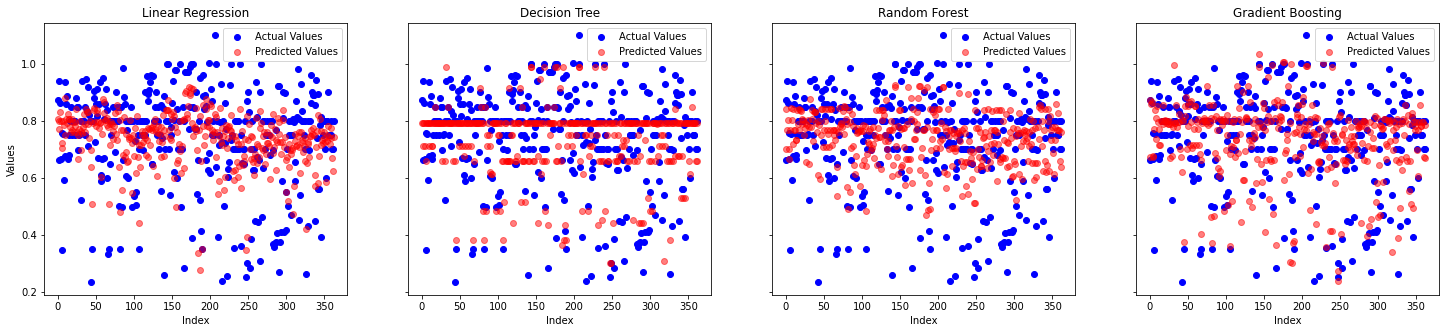

In [0]:
import numpy as np

# Create an array of index values for the x-axis
index_values = np.arange(len(actual_values))

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)

# Linear Regression plot
axes[0].scatter(index_values, actual_values, color='blue', label='Actual Values')
axes[0].scatter(index_values, lr_predicted_values, color='red', label='Predicted Values', alpha=0.5)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Values')
axes[0].set_title('Linear Regression')
axes[0].legend()

# Decision Tree plot
axes[1].scatter(index_values, actual_values, color='blue', label='Actual Values')
axes[1].scatter(index_values, dt_predicted_values, color='red', label='Predicted Values', alpha=0.5)
axes[1].set_xlabel('Index')
axes[1].set_title('Decision Tree')
axes[1].legend()

# Random Forest plot
axes[2].scatter(index_values, actual_values, color='blue', label='Actual Values')
axes[2].scatter(index_values, rf_predicted_values, color='red', label='Predicted Values', alpha=0.5)
axes[2].set_xlabel('Index')
axes[2].set_title('Random Forest')
axes[2].legend()

# Gradient Boosting plot
axes[3].scatter(index_values, actual_values, color='blue', label='Actual Values')
axes[3].scatter(index_values, gbt_predicted_values, color='red', label='Predicted Values', alpha=0.5)
axes[3].set_xlabel('Index')
axes[3].set_title('Gradient Boosting')
axes[3].legend()

plt.show()

#### Model Residual Plots

In [0]:
# Calculate residuals
lr_residuals_df = lr_result.withColumn('residuals', lr_result.actual_productivity - lr_result.prediction)
dt_residuals_df = dt_result.withColumn('residuals', dt_result.actual_productivity - dt_result.prediction)
rf_residuals_df = rf_result.withColumn('residuals', rf_result.actual_productivity - rf_result.prediction)
gbt_residuals_df = gbt_result.withColumn('residuals', gbt_result.actual_productivity - gbt_result.prediction)

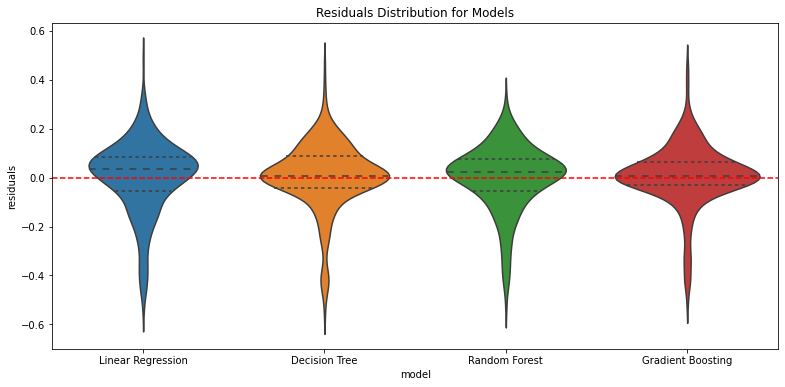

In [0]:
import seaborn as sns

# Convert residuals to Pandas
lr_residuals = lr_residuals_df.select('residuals').toPandas()
dt_residuals = dt_residuals_df.select('residuals').toPandas()
rf_residuals = rf_residuals_df.select('residuals').toPandas()
gbt_residuals = gbt_residuals_df.select('residuals').toPandas()

# Create combined DataFrame for plotting
residuals_df = pd.concat([
    lr_residuals.assign(model='Linear Regression'),
    dt_residuals.assign(model='Decision Tree'),
    rf_residuals.assign(model='Random Forest'),
    gbt_residuals.assign(model='Gradient Boosting')
], ignore_index=True)

# Create violin plot
plt.figure(figsize=(13, 6))
sns.violinplot(data=residuals_df, x='model', y='residuals', inner='quartile')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Distribution for Models')
plt.show()


Residual distribution is approximately symmetrical around zero, which indicates that the model predictions are likely to be above or below the actual productivity values.
Quartile lines inside the violin indicate the range of the residuals, and the red dashed line represents the zero line, which indicates that model predicted the actual productivity value perfectly.

#### Residuals

In [0]:
from pyspark.sql.functions import mean, stddev, min, max

# Calculate residuals summary statistics for models
lr_summary_df = lr_residuals_df.select(mean('residuals').alias('mean'), stddev('residuals').alias('stddev'), min('residuals').alias('min'), max('residuals').alias('max'))
dt_summary_df = dt_residuals_df.select(mean('residuals').alias('mean'), stddev('residuals').alias('stddev'), min('residuals').alias('min'), max('residuals').alias('max'))
rf_summary_df = rf_residuals_df.select(mean('residuals').alias('mean'), stddev('residuals').alias('stddev'), min('residuals').alias('min'), max('residuals').alias('max'))
gbt_summary_df = gbt_residuals_df.select(mean('residuals').alias('mean'), stddev('residuals').alias('stddev'), min('residuals').alias('min'), max('residuals').alias('max'))

# print residuals summary statistics for models
print("Linear Regression Residuals:")
lr_summary_df.show()
print("Decision Tree Residuals:")
dt_summary_df.show()
print("Random Forest Residuals:")
rf_summary_df.show()
print("Gradient Boosting Residuals:")
gbt_summary_df.show()

Linear Regression Residuals:
+--------------------+-------------------+-------------------+-------------------+
|                mean|             stddev|                min|                max|
+--------------------+-------------------+-------------------+-------------------+
|0.002585610570184...|0.14968399428954846|-0.5362930255814364|0.48081755705434953|
+--------------------+-------------------+-------------------+-------------------+

Decision Tree Residuals:
+-------------------+------------------+-------------------+-------------+
|               mean|            stddev|                min|          max|
+-------------------+------------------+-------------------+-------------+
|0.00592371121523949|0.1373438634167539|-0.5546710165435356|0.46763087425|
+-------------------+------------------+-------------------+-------------+

Random Forest Residuals:
+--------------------+------------------+-------------------+-------------------+
|                mean|            stddev|      

Overall models, the mean of the residuals is very close to zero and standard deviation is small, which indicates that the models are performing well in terms of predicting (actual productivity) values.